In [68]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import csv
import pandas as pd

In [69]:
csv_path_ride = os.path.join('./Resources/ride_data.csv') 
csv_path_city = os.path.join('./Resources/city_data.csv') 
ride_df = pd.read_csv(csv_path_ride)
city_df = pd.read_csv(csv_path_city)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [70]:
pyber_df = pd.merge(ride_df, city_df, how='left', on='city')

In [84]:
pyber_df = pyber_df.sort_values('city')
pyber_df.reset_index()
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
155,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,21,Urban
1431,Alvarezhaven,2016-06-16 18:29:05,32.46,858631473935,21,Urban
1439,Alvarezhaven,2016-03-16 02:01:15,33.62,8974645194719,21,Urban
1087,Alvarezhaven,2016-05-01 14:35:12,22.54,6435260355302,21,Urban
1580,Alvarezhaven,2016-05-16 15:33:14,6.45,8939751998750,21,Urban


In [47]:
# Find the average fare per city
fare_df = pyber_df.groupby(by='city')
fare_df = fare_df.mean()
# Create a list
avg_fare = fare_df['fare'].tolist()

In [105]:
# Create a dataframe for only urban
urban_df = pyber_df.loc[pyber_df['type'] == 'Urban']

# Find the total amount of fares
urban_fare = urban_df['fare'].sum()
print(urban_fare)

# Find the driver count
urban_driver_df = urban_df.groupby(by='city')
urban_driver_count = urban_driver_df['driver_count'].sum()
urban_driver_count = urban_driver_count.sum()
print(urban_driver_count)

# Find the total number of rides
urban_ride = urban_df['ride_id'].count()
print(urban_ride)

40078.34
64501
1625


In [104]:
# Create a dataframe for only rural
rural_df = pyber_df.loc[pyber_df['type'] == 'Rural']

# Find the total amount of fares
rural_fare = rural_df['fare'].sum()
print(rural_fare)

# Find the driver count
rural_driver_df = rural_df.groupby(by='city')
rural_driver_count = rural_driver_df['driver_count'].sum()
rural_driver_count = rural_driver_count.sum()
print(rural_driver_count)

# Find the total number of rides
rural_ride = rural_df['ride_id'].count()
print(rural_ride)

4255.09
727
125


In [103]:
# Create a dataframe for only suburban
suburban_df = pyber_df.loc[pyber_df['type'] == 'Suburban']

# Find the total amount of fares
suburban_fare = suburban_df['fare'].sum()
print(suburban_fare)

# Find the driver count
suburban_driver_df = suburban_df.groupby(by='city')
suburban_driver_count = suburban_driver_df['driver_count'].sum()
suburban_driver_count = suburban_driver_count.sum()
print(suburban_driver_count)

# Find the total number of rides
suburban_ride = suburban_df['ride_id'].count()
print(suburban_ride)

20335.690000000013
9730
657


In [107]:
# Find value of total fares
total_fare = suburban_fare + rural_fare + urban_fare
print(total_fare)

# Find value of total drivers
total_driver = suburban_driver_count + rural_driver_count + urban_driver_count
print(total_driver)

# Find value of total riders
total_ride = suburban_ride + rural_ride + urban_ride
print(total_ride)

64669.12000000001
74958
2407


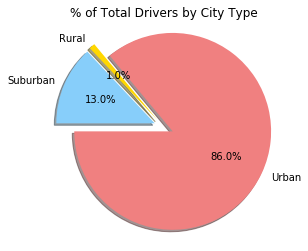

In [187]:
# Make the pie chart for driver counts
# Labels for the sections of our pie chart
labels = ['Urban','Rural','Suburban']

# The values of each section of the pie chart
values = [urban_driver_count, rural_driver_count, suburban_driver_count]

# The colors of each section of the pie chart
colors = ["lightcoral", "Gold", "lightskyblue"]

# Seperate the the small values
explode = [.1 , .1, .1]

# Plot the pie chart
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%"
       , shadow=True, startangle=180)

plt.title("% of Total Drivers by City Type")
plt.axis('image')

plt.show()

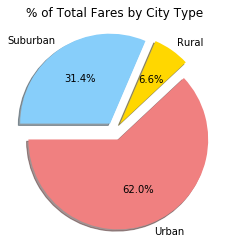

In [189]:
# Make the pie chart for fares
# Labels for the sections of our pie chart
labels = ['Urban','Rural','Suburban']

# The values of each section of the pie chart
values = [urban_fare, rural_fare, suburban_fare]

# The colors of each section of the pie chart
colors = ["lightcoral", "Gold", "lightskyblue"]

# Seperate the the small values
explode = [.1 , .1, .1]

# Plot the pie chart
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%"
       , shadow=True, startangle=180)

plt.title("% of Total Fares by City Type")
plt.axis('image')

plt.show()

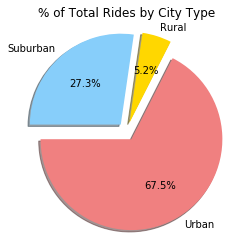

In [188]:
# Make the pie chart for rides
# Labels for the sections of our pie chart
labels = ['Urban','Rural','Suburban']

# The values of each section of the pie chart
values = [urban_ride, rural_ride, suburban_ride]

# The colors of each section of the pie chart
colors = ["lightcoral", "Gold", "lightskyblue"]

# Seperate the the small values
explode = [.1 , .1, .1]

# Plot the pie chart
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%"
       , shadow=True, startangle=180)

plt.title("% of Total Rides by City Type")
plt.axis('image')

plt.show()

In [158]:
# Find average fare per city / Urban
urban_avg_fare_df = urban_df.groupby('city')
urban_avg_fare_df = urban_avg_fare_df.mean()
urban_avg_fare_list = avg_fare_df['fare'].tolist()

# Find average fare per city / Rural
rural_avg_fare_df = rural_df.groupby('city')
rural_avg_fare_df = rural_avg_fare_df.mean()
rural_avg_fare_list = rural_avg_fare_df['fare'].tolist()


# Find average fare per city / Suburban
suburban_avg_fare_df = suburban_df.groupby('city')
suburban_avg_fare_df = suburban_avg_fare_df.mean()
suburban_avg_fare_list = suburban_avg_fare_df['fare'].tolist()


In [159]:
# Find total number of rides per city / Urban
urban_avg_ride_df = urban_df.groupby('city')
urban_avg_ride_df = urban_avg_ride_df.count()
urban_avg_ride_list = urban_avg_ride_df['ride_id'].tolist()
urban_avg_ride_list

# Find total number of rides per city / Rural
rural_avg_ride_df = rural_df.groupby('city')
rural_avg_ride_df = rural_avg_ride_df.count()
rural_avg_ride_list = rural_avg_ride_df['ride_id'].tolist()
rural_avg_ride_list

# Find total number of rides per city / Suburban
suburban_avg_ride_df = suburban_df.groupby('city')
suburban_avg_ride_df = suburban_avg_ride_df.count()
suburban_avg_ride_list = suburban_avg_ride_df['ride_id'].tolist()

In [167]:
# Find total number of drivers per city / Urban
urban_drive_df = city_df.loc[city_df['type'] == 'Urban']
urban_drive_list = urban_drive_df['driver_count'].tolist()
print(urban_drive_list)

# Find total number of drivers per city / Rural
rural_drive_df = city_df.loc[city_df['type'] == 'Rural']
rural_drive_list = rural_drive_df['driver_count'].tolist()
print(rural_drive_list)

# Find total number of drivers per city / Suburban
suburban_drive_df = city_df.loc[city_df['type'] == 'Suburban']
suburban_drive_list = suburban_drive_df['driver_count'].tolist()
print(suburban_drive_list)

[63, 8, 12, 34, 52, 4, 70, 37, 70, 66, 34, 67, 55, 28, 15, 12, 61, 13, 67, 46, 7, 11, 42, 31, 41, 70, 47, 60, 64, 69, 58, 9, 55, 26, 63, 22, 68, 9, 20, 47, 55, 15, 30, 49, 35, 43, 11, 43, 22, 13, 52, 73, 11, 21, 49, 12, 73, 51, 45, 44, 8, 43, 25, 65, 65, 21]
[3, 3, 3, 6, 3, 6, 9, 4, 3, 3, 7, 6, 10, 6, 9, 10, 8, 5]
[4, 26, 9, 4, 19, 22, 5, 9, 7, 24, 12, 1, 9, 8, 16, 27, 18, 20, 15, 16, 13, 25, 14, 9, 10, 21, 27, 6, 16, 18, 20, 11, 13, 17, 3, 26, 26, 26, 21, 18, 5, 22]


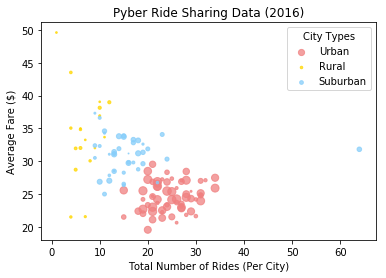

In [194]:
# Plot

urban = plt.scatter(urban_avg_ride_list, urban_avg_fare_list, (urban_drive_list *10) ,c='lightcoral', alpha=.75)
rural = plt.scatter(rural_avg_ride_list, rural_avg_fare_list, (rural_drive_list *10),c='Gold', alpha=.75)
suburban = plt.scatter(suburban_avg_ride_list, suburban_avg_fare_list, (suburban_drive_list *10),c='lightskyblue', alpha=.75)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend((urban,rural,suburban),('Urban','Rural', 'Suburban'),loc='best',title='City Types')
plt.show()

In [190]:
plt.scatter?
